<table>
<tr>
    <th>Nome e Cognome</th>
    <td>Rebecca Guolo</td>
</tr>
<tr>
    <th>Matricola</th>
    <td>VR447933</td>
</tr>
<tr>
    <th>Insegnamento</th>
    <td>Linguaggi di programmazione per l'ambito umanistico</td>
</tr>
<tr>
    <th>Anno Accademico</th>
    <td>2020/2021</td>
</tr>
</table>



# I messaggi di Zodiac

Zodiac è un un serial killer che uccise 5 persone (si sospetta siano molte di più ma non si hanno prove schiaccianti) nella California settentrionale tra il 1968 e 1969. L'assassino inviò un certo numero di lettere alla stampa fino al 1974, dove era lui stesso a firmarsi con l'appellativo di Zodiac. La particolarità di queste lettere è che contenevano anche crittogrammi, quattro per la precisione; ad oggi solo due sono stati decifrati.

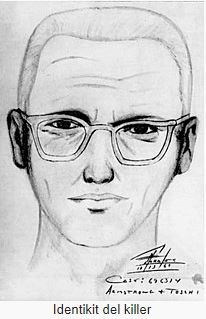

Nell'agosto del 1969 tre diversi quotidiani statunitensi ricevettero una lettera dove Zodiac confessava 3 omicidi. Inoltre ogni lettera riportava un terzo di un crittogramma. Successivamente Zodiac dichiarerà che in questi crittogrammi svela la sua identità. 
L'assassino aveva ordinato che questi suoi scritti dovessero essere pubblicati nei loro quotidiani o avrebbe ucciso una dozzina di persone. 

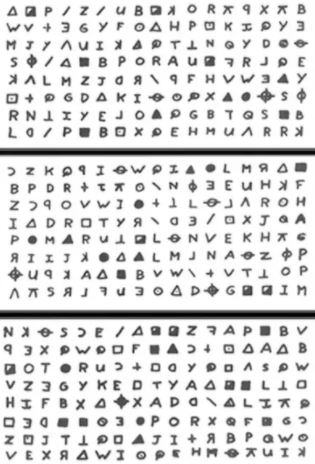

Due lettori di uno di questi quotidiani riuscirono a decifrare il messaggio:

In [33]:
with open("Message 1.txt", mode="r", encoding="UTF-8") as primoMessaggio:
  primoTesto = primoMessaggio.read()
print(primoTesto)

I LIKE KILLING PEOPLE BECAUSE IT IS SO MUCH FUN IT IS MORE FUN THAN
KILLING WILD GAME IN THE FORREST BECAUSE MAN IS THE MOST DANGEROUS
ANAMAL OF ALL TO KILL SOMETHING GIVES ME THE MOST THRILLING
EXPERENCE IT IS EVEN BETTER THAN GETTING YOUR ROCKS OFF WITH A GIRL
THE BEST PART OF IT IS THAT WHEN I DIE I WILL BE REBORN IN PARADICE AND
ALL THE I HAVE KILLED WILL BECOME MY SLAVES I WILL NOT GIVE YOU MY
NAME BECAUSE YOU WILL TRY TO SLOI DOWN OR STOP MY COLLECTING OF
SLAVES FOR MY AFTERLIFE EBEORIETEMETHHPITI


Invece il secondo messaggio è stato decifrato solo qualche mese fa: 


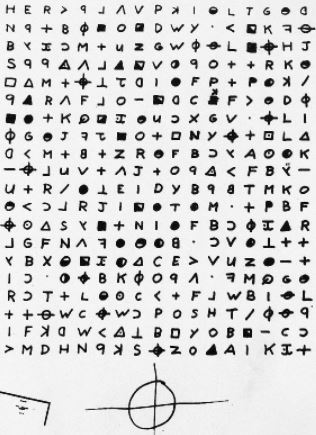

In [34]:
with open("Message 2.txt", mode="r", encoding="UTF-8") as secondoMessaggio:
  secondoTesto = secondoMessaggio.read()
print(secondoTesto)

I HOPE YOU ARE HAVING LOT OF FUN IN TRYING TO CATCH ME THAT WASN’T
ME ON THE TV SHOW WHICH BRINGS UP A POINT ABOUT ME I AM NOT AFRAID
OF THE GAS CHAMBER BECAUSE IT WILL SEND ME TO PARADICE ALL THE
SOONER BECAUSE I NOW HAVE ENOUGH SLAVES TO WORK FOR ME WHERE
EVERYONE ELSE HAS NOTHING WHEN THEY REACH PARADICE SO THEY ARE
AFRAID OF DEATH I AM NOT AFRAID BECAUSE I KNOW THAT MY NEW LIFE WILL
BE AN EASY ONE IN PARADICE DEATH


I due testi differiscono in lunghezza: 

In [35]:
def lunghezzaMessaggio(text):
   lunghezza = len(text)
   return lunghezza

Volendo fare delle analisi NLP sui testi è necessario installare il modulo nltk ed importarlo.

In [4]:
!pip install nltk
import nltk
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

Come prima cosa si dividono i testi in token: 

In [36]:
def divisioneToken(text):
  tokens = nltk.word_tokenize(text)
  return tokens

Nonostante siano crittogrammi e non testi veri e propri, è opportuno eliminare la punteggiatura, principalmente per non tenere in considerazione durante le analisi eventuali apostrofi dati dalle abbreviazioni, tipiche della lingua inglese: 

In [37]:
def tokenNoPunteggiatura(text):
  tokens = nltk.word_tokenize(text)
  noPunteggiatura = []
  for token in tokens:
    if token.isalnum():
      noPunteggiatura.append(token)
  return noPunteggiatura

Per stabilire la densità di vocabolario, è prima necessario individuare i token unici:

In [38]:
def tokenUnici(text): #toglie le ripetizione: se the compare tre volte, qua lo riporta una sola volta; non ritorna i token che compaiono una sola volta.
  tokens = tokenNoPunteggiatura(text)
  unici = set(tokens)
  return unici

Dividendo il numero di token totali con il numero di token unici si ha la densità del vocabolario:


In [39]:
def densitaVocabolario(text):
  valoreDensita = len(tokenUnici(text)) / len(tokenNoPunteggiatura(text))
  return valoreDensita 

In [40]:
if __name__ == "__main__":
  print("Il {: <7} messaggio contiene {} caratteri.".format("primo", lunghezzaMessaggio(primoTesto)))
  print("Il {: <7} messaggio contiene {} caratteri.".format("secondo", lunghezzaMessaggio(secondoTesto)))
  print("Ecco il {: <7} messaggio diviso in token: {}".format("primo", divisioneToken(primoTesto)))
  print("Ecco il {: <7} messaggio diviso in token: {}".format("secondo", divisioneToken(secondoTesto)))
  print("Prima di applicare il metodo .isalnum() i token del {: <7} messaggio erano {}, dopo invece risultano {}.".format("primo", len(divisioneToken(primoTesto)), len(tokenNoPunteggiatura(primoTesto))))
  print("Prima di applicare il metodo .isalnum() i token del {: <7} messaggio erano {}, dopo invece risultano {}.".format("secondo", len(divisioneToken(secondoTesto)), len(tokenNoPunteggiatura(secondoTesto))))
  print("Nel {: <7} messaggio {} token sono unici e sono i seguenti {}".format("primo", len(tokenUnici(primoTesto)), tokenUnici(secondoTesto)))
  print("Nel {: <7} messaggio {} token sono unici e sono i seguenti {}".format("secondo", len(tokenUnici(secondoTesto)), tokenUnici(secondoTesto)))
  print("La densità di vocabolario del {: <7} messaggio è {:1.2f}.".format("primo", densitaVocabolario(primoTesto)))
  print("La densità di vocabolario del {: <7} messaggio è {:1.2f}.".format("secondo", densitaVocabolario(secondoTesto)))

Il primo   messaggio contiene 508 caratteri.
Il secondo messaggio contiene 422 caratteri.
Ecco il primo   messaggio diviso in token: ['I', 'LIKE', 'KILLING', 'PEOPLE', 'BECAUSE', 'IT', 'IS', 'SO', 'MUCH', 'FUN', 'IT', 'IS', 'MORE', 'FUN', 'THAN', 'KILLING', 'WILD', 'GAME', 'IN', 'THE', 'FORREST', 'BECAUSE', 'MAN', 'IS', 'THE', 'MOST', 'DANGEROUS', 'ANAMAL', 'OF', 'ALL', 'TO', 'KILL', 'SOMETHING', 'GIVES', 'ME', 'THE', 'MOST', 'THRILLING', 'EXPERENCE', 'IT', 'IS', 'EVEN', 'BETTER', 'THAN', 'GETTING', 'YOUR', 'ROCKS', 'OFF', 'WITH', 'A', 'GIRL', 'THE', 'BEST', 'PART', 'OF', 'IT', 'IS', 'THAT', 'WHEN', 'I', 'DIE', 'I', 'WILL', 'BE', 'REBORN', 'IN', 'PARADICE', 'AND', 'ALL', 'THE', 'I', 'HAVE', 'KILLED', 'WILL', 'BECOME', 'MY', 'SLAVES', 'I', 'WILL', 'NOT', 'GIVE', 'YOU', 'MY', 'NAME', 'BECAUSE', 'YOU', 'WILL', 'TRY', 'TO', 'SLOI', 'DOWN', 'OR', 'STOP', 'MY', 'COLLECTING', 'OF', 'SLAVES', 'FOR', 'MY', 'AFTERLIFE', 'EBEORIETEMETHHPITI']
Ecco il secondo messaggio diviso in token: ['I', 'HOPE

Nltk permette anche di individuare le parole che occorrono una sola volta: 

In [41]:
def lista(text):
  listaTesto = tokenNoPunteggiatura(text)
  return listaTesto

def numeroParole(text):
  conteggi = {}
  for parola in lista(text):
    if parola not in conteggi:
      conteggi[parola]=1
    else:
        conteggi[parola]+=1
  return conteggi

def paroleUniche(text):
    for (parola, numero) in numeroParole(text).items():
      if numero == 1:
        print(parola)

print(numeroParole(primoTesto))
print(numeroParole(secondoTesto))

{'I': 5, 'LIKE': 1, 'KILLING': 2, 'PEOPLE': 1, 'BECAUSE': 3, 'IT': 4, 'IS': 5, 'SO': 1, 'MUCH': 1, 'FUN': 2, 'MORE': 1, 'THAN': 2, 'WILD': 1, 'GAME': 1, 'IN': 2, 'THE': 5, 'FORREST': 1, 'MAN': 1, 'MOST': 2, 'DANGEROUS': 1, 'ANAMAL': 1, 'OF': 3, 'ALL': 2, 'TO': 2, 'KILL': 1, 'SOMETHING': 1, 'GIVES': 1, 'ME': 1, 'THRILLING': 1, 'EXPERENCE': 1, 'EVEN': 1, 'BETTER': 1, 'GETTING': 1, 'YOUR': 1, 'ROCKS': 1, 'OFF': 1, 'WITH': 1, 'A': 1, 'GIRL': 1, 'BEST': 1, 'PART': 1, 'THAT': 1, 'WHEN': 1, 'DIE': 1, 'WILL': 4, 'BE': 1, 'REBORN': 1, 'PARADICE': 1, 'AND': 1, 'HAVE': 1, 'KILLED': 1, 'BECOME': 1, 'MY': 4, 'SLAVES': 2, 'NOT': 1, 'GIVE': 1, 'YOU': 2, 'NAME': 1, 'TRY': 1, 'SLOI': 1, 'DOWN': 1, 'OR': 1, 'STOP': 1, 'COLLECTING': 1, 'FOR': 1, 'AFTERLIFE': 1, 'EBEORIETEMETHHPITI': 1}
{'I': 5, 'HOPE': 1, 'YOU': 1, 'ARE': 2, 'HAVING': 1, 'LOT': 1, 'OF': 3, 'FUN': 1, 'IN': 2, 'TRYING': 1, 'TO': 3, 'CATCH': 1, 'ME': 5, 'THAT': 2, 'WASN': 1, 'T': 1, 'ON': 1, 'THE': 3, 'TV': 1, 'SHOW': 1, 'WHICH': 1, 'BRINGS

In [42]:
paroleUniche(primoTesto)

LIKE
PEOPLE
SO
MUCH
MORE
WILD
GAME
FORREST
MAN
DANGEROUS
ANAMAL
KILL
SOMETHING
GIVES
ME
THRILLING
EXPERENCE
EVEN
BETTER
GETTING
YOUR
ROCKS
OFF
WITH
A
GIRL
BEST
PART
THAT
WHEN
DIE
BE
REBORN
PARADICE
AND
HAVE
KILLED
BECOME
NOT
GIVE
NAME
TRY
SLOI
DOWN
OR
STOP
COLLECTING
FOR
AFTERLIFE
EBEORIETEMETHHPITI


In [43]:
paroleUniche(secondoTesto)

HOPE
YOU
HAVING
LOT
FUN
TRYING
CATCH
WASN
T
ON
TV
SHOW
WHICH
BRINGS
UP
A
POINT
ABOUT
GAS
CHAMBER
IT
SEND
ALL
SOONER
NOW
HAVE
ENOUGH
SLAVES
WORK
FOR
WHERE
EVERYONE
ELSE
HAS
NOTHING
WHEN
REACH
SO
KNOW
MY
NEW
LIFE
BE
AN
EASY
ONE


# Pos Tagging

Un'altro tipo di analisi può essere fatta tramite Pos tagging che associa ogni parola alla categoria morfo-sintattica alla quale appartiene: 

In [44]:
def posTagging(text):
  tokens = nltk.word_tokenize(text)
  pos = nltk.pos_tag(tokens, tagset="universal") 
  return pos

print(posTagging(primoTesto))
print(posTagging(secondoTesto)) 

[('I', 'PRON'), ('LIKE', 'VERB'), ('KILLING', 'VERB'), ('PEOPLE', 'NOUN'), ('BECAUSE', 'ADP'), ('IT', 'NOUN'), ('IS', 'NOUN'), ('SO', 'NOUN'), ('MUCH', 'NOUN'), ('FUN', 'NOUN'), ('IT', 'NOUN'), ('IS', 'NOUN'), ('MORE', 'NOUN'), ('FUN', 'NOUN'), ('THAN', 'NOUN'), ('KILLING', 'NOUN'), ('WILD', 'NOUN'), ('GAME', 'NOUN'), ('IN', 'NOUN'), ('THE', 'NOUN'), ('FORREST', 'NOUN'), ('BECAUSE', 'NOUN'), ('MAN', 'NOUN'), ('IS', 'VERB'), ('THE', 'DET'), ('MOST', 'NOUN'), ('DANGEROUS', 'NOUN'), ('ANAMAL', 'NOUN'), ('OF', 'NOUN'), ('ALL', 'NOUN'), ('TO', 'NOUN'), ('KILL', 'NOUN'), ('SOMETHING', 'NOUN'), ('GIVES', 'NOUN'), ('ME', 'NOUN'), ('THE', 'NOUN'), ('MOST', 'NOUN'), ('THRILLING', 'NOUN'), ('EXPERENCE', 'NOUN'), ('IT', 'NOUN'), ('IS', 'NOUN'), ('EVEN', 'NOUN'), ('BETTER', 'NOUN'), ('THAN', 'NOUN'), ('GETTING', 'NOUN'), ('YOUR', 'NOUN'), ('ROCKS', 'NOUN'), ('OFF', 'NOUN'), ('WITH', 'NOUN'), ('A', 'NOUN'), ('GIRL', 'NOUN'), ('THE', 'NOUN'), ('BEST', 'NOUN'), ('PART', 'NOUN'), ('OF', 'ADP'), ('IT', 

L'analisi ha prodotto risultati sbagliati per il più delle volte, probabilmente in quanto non si sta analizzando un testo, bensì un crittogramma. Siccome ha assegnato alla maggior parte delle parole la categoria `NOUN` sarebbe utile provare a trasformare l'intero testo in lettere minuscole, per evitare che consideri un Nome una parola solo perchè ha la prima lettera maiuscola. 
Dopodichè si può riprovare con l'analisi Pos tagging.

In [45]:
def trasformazioneMinuscolo(text):
  minuscolo = text.lower()
  return minuscolo

print(posTagging(trasformazioneMinuscolo(primoTesto)))
print(posTagging(trasformazioneMinuscolo(secondoTesto)))

[('i', 'NOUN'), ('like', 'ADP'), ('killing', 'VERB'), ('people', 'NOUN'), ('because', 'ADP'), ('it', 'PRON'), ('is', 'VERB'), ('so', 'ADV'), ('much', 'ADJ'), ('fun', 'NOUN'), ('it', 'PRON'), ('is', 'VERB'), ('more', 'ADV'), ('fun', 'ADJ'), ('than', 'ADP'), ('killing', 'VERB'), ('wild', 'ADJ'), ('game', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('forrest', 'NOUN'), ('because', 'ADP'), ('man', 'NOUN'), ('is', 'VERB'), ('the', 'DET'), ('most', 'ADV'), ('dangerous', 'ADJ'), ('anamal', 'NOUN'), ('of', 'ADP'), ('all', 'DET'), ('to', 'PRT'), ('kill', 'VERB'), ('something', 'NOUN'), ('gives', 'VERB'), ('me', 'PRON'), ('the', 'DET'), ('most', 'ADV'), ('thrilling', 'ADJ'), ('experence', 'NOUN'), ('it', 'PRON'), ('is', 'VERB'), ('even', 'ADV'), ('better', 'ADJ'), ('than', 'ADP'), ('getting', 'VERB'), ('your', 'PRON'), ('rocks', 'NOUN'), ('off', 'PRT'), ('with', 'ADP'), ('a', 'DET'), ('girl', 'NOUN'), ('the', 'DET'), ('best', 'ADJ'), ('part', 'NOUN'), ('of', 'ADP'), ('it', 'PRON'), ('is', 'VERB'), (

Nonostante non sia ancora perfetta, molte parole che prima erano considerate `NOUN` ora sono contrassegnate con la giusta categoria morfo-sintattica. 
Vediamo ora a livello numerico:

In [46]:
def conteggioCategorie(text):
  tokens = nltk.word_tokenize(text)
  pos = nltk.pos_tag(tokens, tagset="universal")
  categorie = {}                                   
  for coppia in pos:                               
    if coppia[1] in categorie:                    
      categorie[coppia[1]]+=1                      
    else:
      categorie[coppia[1]]=1                       
  return categorie

categorieMaiuscoloPrimo = conteggioCategorie(primoTesto)
categorieMinuscoloPrimo = conteggioCategorie(trasformazioneMinuscolo(primoTesto))
categorieMaiuscoloSecondo = conteggioCategorie(secondoTesto)
categorieMinuscoloSecondo = conteggioCategorie(trasformazioneMinuscolo(secondoTesto))

print(categorieMaiuscoloPrimo)
print(categorieMinuscoloPrimo) #ADP = adposition; ADV = adverb; DET = determiner; CONJ = conjuction
print(categorieMaiuscoloSecondo)
print(categorieMinuscoloSecondo) 

{'PRON': 5, 'VERB': 12, 'NOUN': 80, 'ADP': 3, 'DET': 1}
{'NOUN': 21, 'ADP': 14, 'VERB': 25, 'PRON': 12, 'ADV': 7, 'ADJ': 8, 'DET': 8, 'PRT': 4, 'CONJ': 2}
{'PRON': 6, 'VERB': 10, 'NOUN': 67, 'ADP': 7, 'ADV': 1}
{'NOUN': 21, 'VERB': 22, 'PRON': 10, 'ADP': 14, 'PRT': 4, 'DET': 7, 'ADV': 6, 'ADJ': 6, 'NUM': 1}


Analizzando i numeri è ancora più evidente che l'assegnazione delle categorie viene migliorata se viene fatta su un testo non con parole tutte maiuscole. 
Con un diagramma a torta è ancora più evidente:

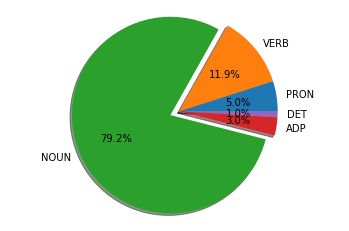

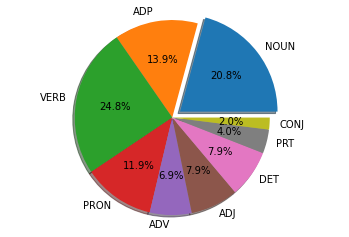

In [47]:
import matplotlib.pyplot as plt

#primo messaggio
chiaveCategorie1M = categorieMaiuscoloPrimo.keys()
chiaveCategorie1m = categorieMinuscoloPrimo.keys()
valoriCategorie1M = categorieMaiuscoloPrimo.values()
valoriCategorie1m = categorieMinuscoloPrimo.values()

#grafico1M
labels = chiaveCategorie1M
sizes = valoriCategorie1M
explode = (0, 0, 0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

#grafico1m
labels = chiaveCategorie1m
sizes = valoriCategorie1m
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')  
plt.show()

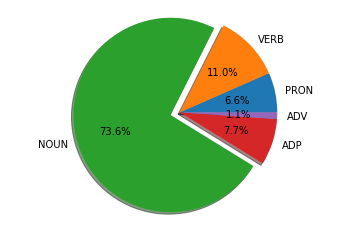

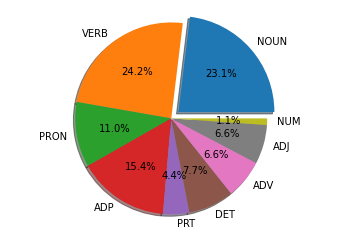

In [48]:
#2messaggio
chiaveCategorie2M = categorieMaiuscoloSecondo.keys()
chiaveCategorie2m = categorieMinuscoloSecondo.keys()
valoriCategorie2M = categorieMaiuscoloSecondo.values()
valoriCategorie2m = categorieMinuscoloSecondo.values()

#grafico2M
labels = chiaveCategorie2M
sizes = valoriCategorie2M
explode = (0, 0, 0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')  
plt.show()

#grafico2m
labels = chiaveCategorie2m
sizes = valoriCategorie2m
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')  
plt.show()

# Sentiment analysis

Si possono eseguire delle analisi del sentiment (sentiment analysis appunto) per capire se i due messaggi esprimano qualcosa di positivo o di negativo. 
Essendo due messaggi di un serial killer è facile che diano più un risultato negativo, andiamo a verificare!

Per prima cosa si deve invocare il modello che offre nltk, importarlo e poi creare un oggetto analizzatore:

In [18]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analizzatore = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [49]:
def sentimentAnalysis(text):
  sa = (analizzatore.polarity_scores(text))
  return sa

sa1 = analizzatore.polarity_scores(primoTesto) #somma totale è 1
sa2 = analizzatore.polarity_scores(secondoTesto) #compound va da -1 a 1

print("Considerando che i valori vanno da 0 a 1, il valore di negatività del {: <7} testo è {:1.2f}, quello di neutralità è {:1.2f} e infine quello di positività è di {:1.2f}.".format("primo", sa1['neg'], sa1['neu'], sa1['pos']))
print("Considerando che i valori vanno da 0 a 1, il valore di negatività del {: <7} testo è {:1.2f}, quello di neutralità è {:1.2f} e infine quello di positività è di {:1.2f}.".format("secondo", sa2['neg'], sa2['neu'], sa2['pos']))

#compound1
if sa1['compound'] > -1 and sa1['compound'] < 0:
  print("Il {: <7} testo tende alla negatività.".format("primo"))
else:
    print("Il {: <7} testo tende alla positività.".format("primo"))

#compound2
if sa2['compound'] > -1 and sa2['compound'] < 0:
  print("Il {: <7} testo tende alla negatività.".format("secondo"))
else:
    print("Il {: <7} testo tende alla positività.".format("secondo"))

Considerando che i valori vanno da 0 a 1, il valore di negatività del primo   testo è 0.21, quello di neutralità è 0.63 e infine quello di positività è di 0.15.
Considerando che i valori vanno da 0 a 1, il valore di negatività del secondo testo è 0.09, quello di neutralità è 0.81 e infine quello di positività è di 0.10.
Il primo   testo tende alla negatività.
Il secondo testo tende alla positività.


# Parole esistenti

Nonostante i due messaggi siano stati decifrati, non tutte le parole sembrano essere giuste dal punto di vista linguistico. E siccome Zodiac aveva affermato che in questi messaggi avrebbe svelato la sua identità, è bene non perdere nessun dettaglio che si può rivelare un indizio. 

Innanzitutto è necessario installare e importare un modulo contenente tutte le parole inglesi, e dato che le analisi si sono dimostrate più attendibili con il testo in lettere minuscole, ho deciso di importare un modulo contenente tutte le parole inglesi in minuscolo. 

In [20]:
!pip install english-words
from english_words import english_words_lower_alpha_set 

     |████████████████████████████████| 358kB 12.8MB/s 
  Created wheel for english-words: filename=english_words-1.0.3-cp36-none-any.whl size=352084 sha256=5c1a0f58f44c085ead2003c7c947039af12028d16eac30eee49833194999e263
  Stored in directory: /root/.cache/pip/wheels/0b/b1/06/c5071d0b99cabc5e7a8b0d8ab5c0b8d00da83b367990439d1e
Successfully built english-words


In [54]:
parolaUtente = input("Inserisci una qualsiasi parola inglese minuscola per verificare il modello importato: ")
parolaUtente in english_words_lower_alpha_set

Inserisci una qualsiasi parola inglese minuscola per verificare il modello importato: kill


True

Ora è bene verificare che esistano tutte le parole dei messaggi di Zodiac.

In [53]:
min1 = trasformazioneMinuscolo(primoTesto)
m1 = tokenNoPunteggiatura(min1)

min2 = trasformazioneMinuscolo(secondoTesto)
m2 = tokenNoPunteggiatura(min2)

def paroleInesistenti(text):
  inesistenti = []
  for elemento in text:
    if elemento not in english_words_lower_alpha_set:
      inesistenti.append(elemento)
  return inesistenti

inesistentim1 = paroleInesistenti(m1)
inesistentim2 = paroleInesistenti(m2)

print("Le parole inesistenti del {: <7} testo sono {} e sono le seguenti: {}".format("primo", len(inesistentim1), inesistentim1))
print("Le parole inesistenti del {: <7} testo sono {} e sono le seguenti: {}".format("secondo", len(inesistentim2), inesistentim2))

Le parole inesistenti del primo   testo sono 18 e sono le seguenti: ['killing', 'killing', 'forrest', 'anamal', 'gives', 'thrilling', 'experence', 'better', 'getting', 'rocks', 'reborn', 'paradice', 'killed', 'slaves', 'sloi', 'collecting', 'slaves', 'ebeorietemethhpiti']
Le parole inesistenti del secondo testo sono 9 e sono le seguenti: ['having', 'trying', 'wasn', 'brings', 'paradice', 'sooner', 'slaves', 'paradice', 'paradice']


È evidente che il modulo importato tiene in considerazione solo la forma base delle parole, perciò è necessaria la lemmatizzazione.
Per procedere alla lemmatizzazione è prima necessario assegnare alle parole "inesistenti" la loro categoria morfo-sintattica (posTagging)

In [55]:
def stringaInesistenti(list): #postagging si fa con stringhe e non con liste
  return " ".join(list)

stringaInesistentim1 = stringaInesistenti(inesistentim1)
stringaInesistentim2 = stringaInesistenti(inesistentim2)

def posInesistenti(str): #postagging delle parole risultate inesistenti (postagging necessario per lemmatizzazione)
  return posTagging(str)

POS1 = posInesistenti(stringaInesistentim1)  
POS2 = posInesistenti(stringaInesistentim2)

if __name__ == "__main__":
  print(POS1)
  print(POS2)

[('killing', 'VERB'), ('killing', 'VERB'), ('forrest', 'ADJ'), ('anamal', 'ADJ'), ('gives', 'VERB'), ('thrilling', 'VERB'), ('experence', 'NOUN'), ('better', 'ADV'), ('getting', 'VERB'), ('rocks', 'NOUN'), ('reborn', 'VERB'), ('paradice', 'NOUN'), ('killed', 'VERB'), ('slaves', 'NOUN'), ('sloi', 'VERB'), ('collecting', 'VERB'), ('slaves', 'NOUN'), ('ebeorietemethhpiti', 'VERB')]
[('having', 'VERB'), ('trying', 'VERB'), ('wasn', 'ADJ'), ('brings', 'NOUN'), ('paradice', 'NOUN'), ('sooner', 'VERB'), ('slaves', 'NOUN'), ('paradice', 'ADJ'), ('paradice', 'NOUN')]


Da qui in poi non verranno più differenziati i due messaggi, ma si ragionerà sull'unione di entrambi

In [56]:
def POS(text):
  return posInesistenti(stringaInesistenti(paroleInesistenti(tokenNoPunteggiatura(trasformazioneMinuscolo(text)))))
  
POS1 = POS(primoTesto)
POS2 = POS(secondoTesto)
POStotale = POS1 + POS2
print("Di seguito le annotazioni delle presunte parole inesistenti dei due messaggi: {}".format(POStotale))

Di seguito le annotazioni delle presunte parole inesistenti dei due messaggi: [('killing', 'VERB'), ('killing', 'VERB'), ('forrest', 'ADJ'), ('anamal', 'ADJ'), ('gives', 'VERB'), ('thrilling', 'VERB'), ('experence', 'NOUN'), ('better', 'ADV'), ('getting', 'VERB'), ('rocks', 'NOUN'), ('reborn', 'VERB'), ('paradice', 'NOUN'), ('killed', 'VERB'), ('slaves', 'NOUN'), ('sloi', 'VERB'), ('collecting', 'VERB'), ('slaves', 'NOUN'), ('ebeorietemethhpiti', 'VERB'), ('having', 'VERB'), ('trying', 'VERB'), ('wasn', 'ADJ'), ('brings', 'NOUN'), ('paradice', 'NOUN'), ('sooner', 'VERB'), ('slaves', 'NOUN'), ('paradice', 'ADJ'), ('paradice', 'NOUN')]


Si può notare che le categorie prese in considerazione sono `VERB`, `NOUN` e `ADJ`

In [57]:
verbi = []
for annotazione in POStotale:
  if annotazione[1] == "VERB":
    verbi.append(annotazione[0])
print("Le seguenti parole sono state annotate come VERBI: {}".format(verbi))

nomi = []
for annotazione in POStotale:
  if annotazione[1] == "NOUN":
    nomi.append(annotazione[0])
print("Le seguenti parole sono state annotate come NOMI: {}".format(nomi))

aggettivi = []
for annotazione in POStotale:
  if annotazione[1] == "ADJ":
    aggettivi.append(annotazione[0])
print("Le seguenti parole sono state annotate come AGGETTIVI: {}".format(aggettivi))

Le seguenti parole sono state annotate come VERBI: ['killing', 'killing', 'gives', 'thrilling', 'getting', 'reborn', 'killed', 'sloi', 'collecting', 'ebeorietemethhpiti', 'having', 'trying', 'sooner']
Le seguenti parole sono state annotate come NOMI: ['experence', 'rocks', 'paradice', 'slaves', 'slaves', 'brings', 'paradice', 'slaves', 'paradice']
Le seguenti parole sono state annotate come AGGETTIVI: ['forrest', 'anamal', 'wasn', 'paradice']


Ora si può procedere con la lemmatizzazione

In [58]:
lemmatizzatore = nltk.stem.wordnet.WordNetLemmatizer()

verbiLemmi = []
for verbo in verbi:
  verbiLemmi.append(lemmatizzatore.lemmatize(verbo, 'v'))


nomiLemmi = []
for nome in nomi:
  nomiLemmi.append(lemmatizzatore.lemmatize(nome, 'n'))


aggettiviLemmi = []
for aggettivo in aggettivi:
  aggettiviLemmi.append(lemmatizzatore.lemmatize(aggettivo, 'a'))

lemmi = verbiLemmi + nomiLemmi + aggettiviLemmi
print("Questi sono i lemmi: {}".format(lemmi))

Questi sono i lemmi: ['kill', 'kill', 'give', 'thrill', 'get', 'reborn', 'kill', 'sloi', 'collect', 'ebeorietemethhpiti', 'have', 'try', 'sooner', 'experence', 'rock', 'paradice', 'slave', 'slave', 'brings', 'paradice', 'slave', 'paradice', 'forrest', 'anamal', 'wasn', 'paradice']


La lemmatizzazione non sempre è stata eseguita in una maniera corretta ed è sempre a causa dell'erronea Pos tagging (sempre perchè non stiamo analizzando un testo vero e proprio, bensì dei crittogrammi).

In base a ciò, si veda quali parole non esistono

In [59]:
lemmi = verbiLemmi + nomiLemmi + aggettiviLemmi

print("Passando i lemmi alla funzione paroleInesistenti, risulta che non esistono: {}".format(paroleInesistenti(lemmi)))

Passando i lemmi alla funzione paroleInesistenti, risulta che non esistono: ['reborn', 'sloi', 'ebeorietemethhpiti', 'sooner', 'experence', 'paradice', 'brings', 'paradice', 'paradice', 'forrest', 'anamal', 'wasn', 'paradice']


A questo punto sembra bisognoso l'intervento umano, che è in grado di correggere errori dovuti a una erronea divisione in token (wasn' - t) e a una erronea Pos tagging

In [60]:
lemmiInesistenti = paroleInesistenti(lemmi)

umanoInesistenti = lemmiInesistenti[1:3] + lemmiInesistenti[4:6] + lemmiInesistenti[7:11] + lemmiInesistenti[12:] 

print("Dopo l'intervento umano si hanno definitivamente le parole non esistenti: {}".format(umanoInesistenti))

Dopo l'intervento umano si hanno definitivamente le parole non esistenti: ['sloi', 'ebeorietemethhpiti', 'experence', 'paradice', 'paradice', 'paradice', 'forrest', 'anamal', 'paradice']


Ora è bene creare una stringa contenente tutte le lettere che rendono le parole inesistenti.

In [61]:
lettere = []
lettere.append("sloi"[3]) #sloI
lettere.append("i") #experIence #stringhe sono immutabili quindi non posso aggiungere la lettera i
lettere.append("paradice"[6]) #paradiCe
lettere.append("forrest"[3]) #forRest
lettere.append("anamal"[2]) #anAmal
lettere.append("paradice"[6]) #paradiCe
lettere.append("paradice"[6]) #paradiCe
lettere.append("paradice"[6]) #paradiCe

parola = "ebeorietemethhpiti"
listaParola = list(parola)

listaLettere = lettere + listaParola
strLettere = "".join(listaLettere)

print("Qui sono riportate tutte le lettere che rendono le parole inesistenti, alla quale vengono aggiunte tutte le lettere senza senso del primo messaggio: {}".format(strLettere))

Qui sono riportate tutte le lettere che rendono le parole inesistenti, alla quale vengono aggiunte tutte le lettere senza senso del primo messaggio: iicracccebeorietemethhpiti


Se si provano a combinare queste lettere potrebbero risultare delle parole che potrebbero, a loro volta, aiutare nell'identificazione del killer:

In [62]:
from itertools import permutations                             #permutation: rearrangement of the elements of an ordered list S into a one-to-one correspondence with S itself
noDoppi = set()                                                #in un insieme non vengono rappresentate le ripetizioni
                                                               #se si aggiunge n al ciclo annidato dopo listaLettere sarà possibile avere le combinazioni di parole lunghe una lettera e tutta la lunghezza della lista data. Ma la ram si esaurisce. ovviamente il ciclo successivo deve essere annidato
for y in permutations(listaLettere, 5):                        #iterazione di tutte le permutations (for y); se si stampa solo print(list(permutations(listaLettere))) si hanno solo le permutazioni. è necessario scorrerle in un ciclo.
  permutationsGenerate = "".join(y)
  check = permutationsGenerate in english_words_lower_alpha_set
  if check == True:
    noDoppi.add(permutationsGenerate)
print("Di tutte le combinazioni, queste sono quelle sensate: {}".format(noDoppi))

Di tutte le combinazioni, queste sono quelle sensate: {'mario', 'carob', 'barre', 'tahoe', 'caret', 'circe', 'ether', 'price', 'prime', 'otter', 'tempo', 'trite', 'teeth', 'pater', 'pitch', 'birch', 'reach', 'tacit', 'torah', 'prima', 'probe', 'bicep', 'macho', 'charm', 'parch', 'mirth', 'poach', 'terre', 'treat', 'mateo', 'motet', 'crate', 'trait', 'comic', 'chomp', 'bathe', 'brett', 'ethic', 'armco', 'meter', 'crepe', 'march', 'maier', 'erect', 'patio', 'peach', 'hater', 'tibia', 'ratio', 'coach', 'terra', 'cameo', 'circa', 'eater', 'match', 'theme', 'chime', 'tater', 'cater', 'cabot', 'peace', 'chert', 'chair', 'batch', 'amber', 'bator', 'bette', 'birth', 'comet', 'meier', 'crore', 'biota', 'teach', 'other', 'patti', 'orbit', 'crime', 'berth', 'hiatt', 'perth', 'chart', 'boric', 'bream', 'torch', 'chirp', 'roach', 'haiti', 'attic', 'botch', 'cacti', 'tepee', 'cream', 'berra', 'copra', 'creep', 'eerie', 'beret', 'petit', 'porch', 'abort', 'topic', 'tithe', 'carib', 'catch', 'hitch', 

Come era già stato constatato, il modulo `englis_words_lower_alpha_set` non riporta sempre risultati attendibili. Nonostante ciò la maggior parte delle parole riportate sono parole realmente esistenti e quando verranno decifrati anche gli ultimi due messaggi rimanenti, potranno essere prese in considerazione per l'individuazione dell'identità di Zodiac.